# Effects of Loan Characteristics on Interest Rates
## by Philip Karns

## Investigation Overview

In this investigation I wanted to look at the characteristics of loans that affect interest rates the most. The main focus was on credit score, Prosper risk rating, and homeownership status.

## Dataset Overview

There are 113,937 rows and 81 categories. The data consisted of interest rates and attributes of approximately 114,000 loans. The attributes included the ones mentioned above and addtional measurements such as credit utilization, state of residence, and employment status. 

In [24]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [25]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Interest Rates

Loan interest rates in the dataset take on a range of values up to about 35%. The distribution of loans takes on a bimodal shape.

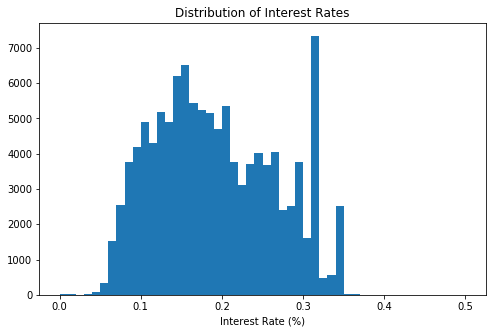

In [26]:
binsize = 0.01
bins = np.arange(0, loans.BorrowerRate.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'BorrowerRate', bins = bins)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)');

## Distribution of Credit Scores

Credit scores of loan borrowers in the dataset range from 450(poor) to 900(Exceptional), with the majority of scores falling between 625(fair) and 775(Very Good). 

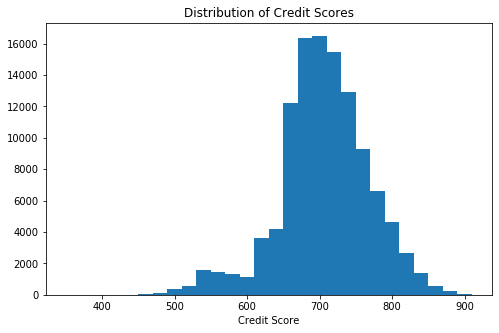

In [27]:
# plotting Credit Score on a standard scale
binsize = 20
bins = np.arange(350, loans['CreditScoreRangeUpper'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'CreditScoreRangeUpper', bins = bins)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score');

## Distribution of Prosper Risk Scores

Prosper Risk Scores of loan borrowers from 1(highest risk) to 10(lowest risk).

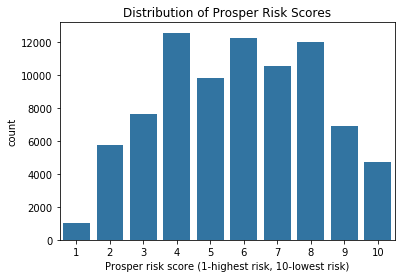

In [28]:
# plotting Prosper Risk Score on a standard scale

#convert data type to ordinal categorical because these are ranked values, not float values
level_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
loan_score_not_null = loans['ProsperScore'] > 0
loans_sub = loans.loc[loan_score_not_null,:]
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
loans_sub['ProsperScore'] = loans_sub['ProsperScore'].astype(ordered_cat)

#plot the data and make all one color
base_color = sb.color_palette()[0]
sb.countplot(data = loans_sub, x = 'ProsperScore', color = base_color);
plt.title('Distribution of Prosper Risk Scores')
plt.xlabel('Prosper risk score (1-highest risk, 10-lowest risk)');

## Interest Rate vs. Credit Score

There's a negative correlation between these two variables, where as credit scores increase, loan interest rates decrease. Having a credit score below 650 almost guarantees that the borrower interest rate will be at least 14%, and even more likely to be above 20%. Most values are saturated in the middle, showing that credit scores between 700 and 800 can see any range of interest rate. This indicates there are other factors that affect interest rates more than credit scores.

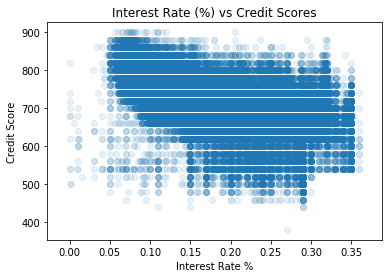

In [29]:
# scatter plot of interest rate vs Credit Score
loans_flag = (loans['CreditScoreRangeUpper'] > 300)
loans_300 = loans.loc[loans_flag,:]

plt.scatter(data = loans_300, x = 'BorrowerRate', y = 'CreditScoreRangeUpper', alpha = 1/10)
plt.title('Interest Rate (%) vs Credit Scores')
plt.xlabel('Interest Rate %')
plt.ylabel('Credit Score');

## Interest Rate vs. Prosper Risk Score

Prosper Risk Score has a direct negative correlation with borrower interest rate. As mentioned above, a lower Prosper score means higher risk, and a higher score means lower risk. We can see in the width of the violin plots that the higher borrower rates are associated with higher risk, and the lower rates are associated with less risk.

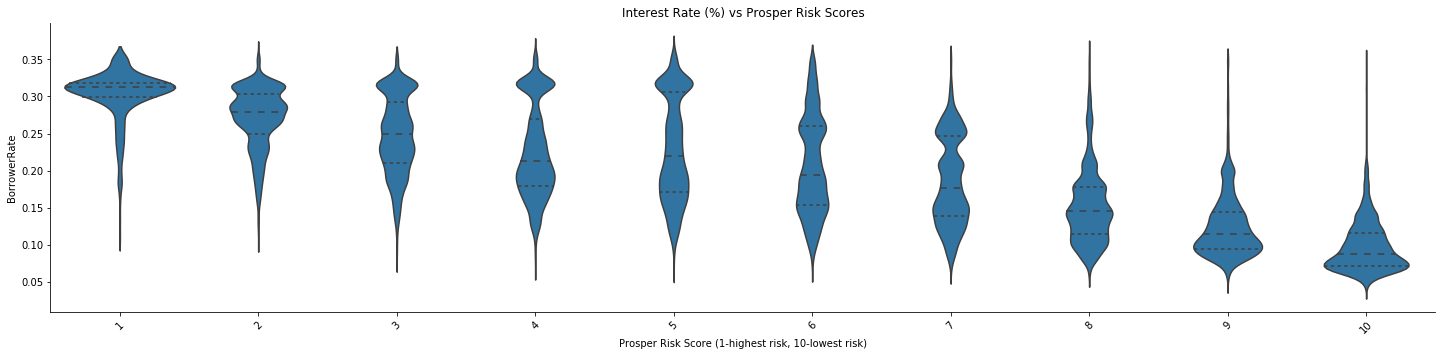

In [30]:
#plot of categorical variables vs interest rate
g = sb.PairGrid(data = loans_sub, x_vars = 'ProsperScore', y_vars = 'BorrowerRate', height = 4)
g.map(sb.violinplot, inner = 'quartile');
plt.title('Interest Rate (%) vs Prosper Risk Scores')
g.fig.set_size_inches(25,5)
plt.xlabel('Interest Rate %')
plt.xlabel('Prosper Risk Score (1-highest risk, 10-lowest risk)');

g.fig.draw(
    g.fig.canvas.get_renderer()
)
for ax in g.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

## Interest Rate and Credit Score vs. Prosper Risk Score

Prosper risk score is a value between 1(highest risk) and 10(lowest risk) that prosper calculates based historical data about the borrower. There is an interaction among these three variables, whereby a higher risk score and higher credit score result in the lowest interest rates. Alternatively, lower risk scores and lower credit scores result in the highest interest rates.

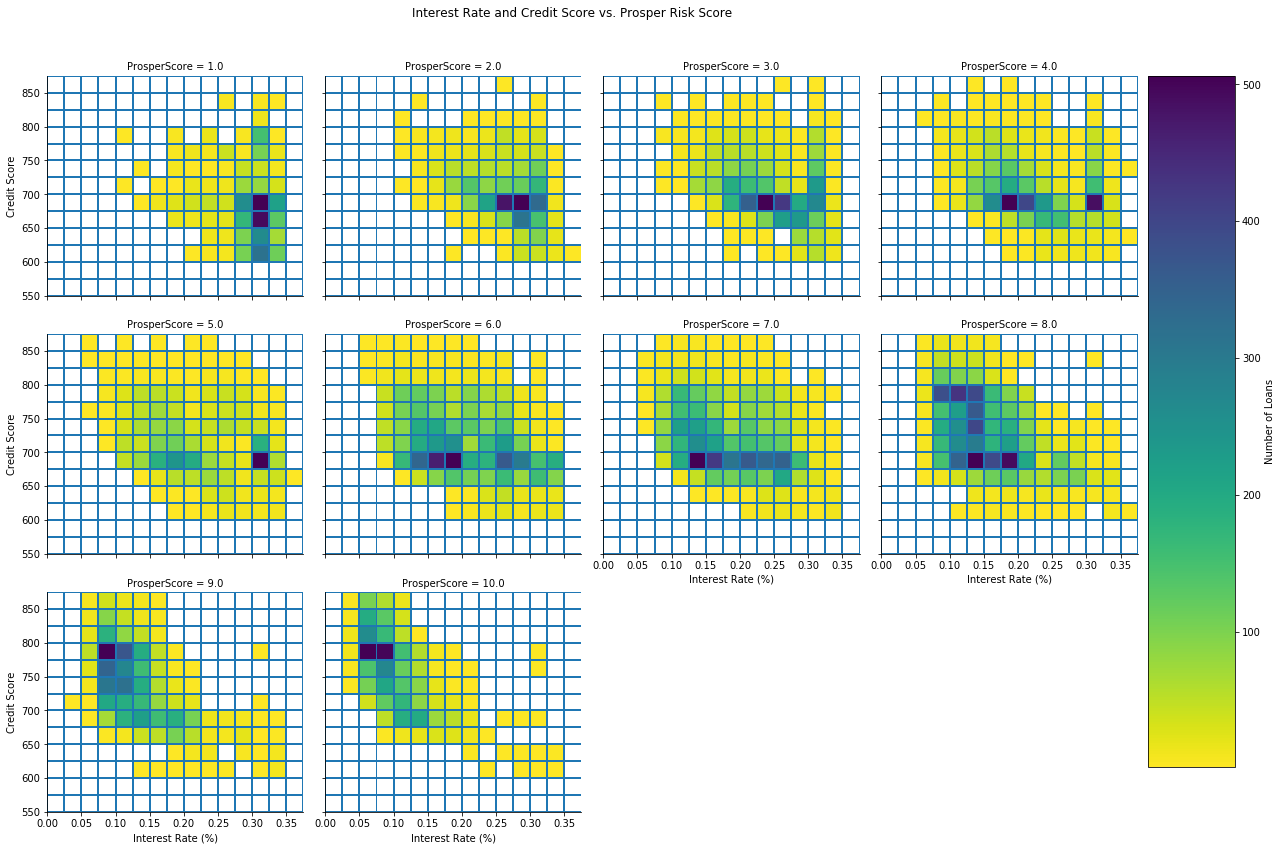

In [31]:
#plot Prosper Score vs credit score and interest rate
#get only valid credit scores over 300 and use a heatmap instead
loans_flag = (loans['CreditScoreRangeUpper'] > 300)
loans_300 = loans.loc[loans_flag,:]

# create faceted heat maps on levels of IsBorrowerHomeowner and ProsperScore
valid_prosper = (loans_300['ProsperScore'] > 0) & (loans_300['ProsperScore'] < 11)
loans_300_val = loans_300.loc[valid_prosper,:]

bins_x = np.arange(0, .35+.05, .025)
bins_y = np.arange(550, 850+50, 25)

g = sb.FacetGrid(data = loans_300_val, col = 'ProsperScore', col_wrap = 4, size = 4)
g.map(plt.hist2d, 'BorrowerRate', 'CreditScoreRangeUpper', cmin = 0.5,  cmap = 'viridis_r', bins = [bins_x, bins_y]);
cax = plt.axes([1, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax, label = 'Number of Loans')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Interest Rate and Credit Score vs. Prosper Risk Score')
g.set_xlabels('Interest Rate (%)')
g.set_ylabels('Credit Score');

## Interest Rate and Credit Score vs Prosper Risk Score and Homeowner Status

Homeownership was also reviewed to determine its affect on interest rates and credit scores, while also considering risk. While homeowners did generally have higher credit scores, it did not have a significant effect on a borrower's risk or their interest rates. 

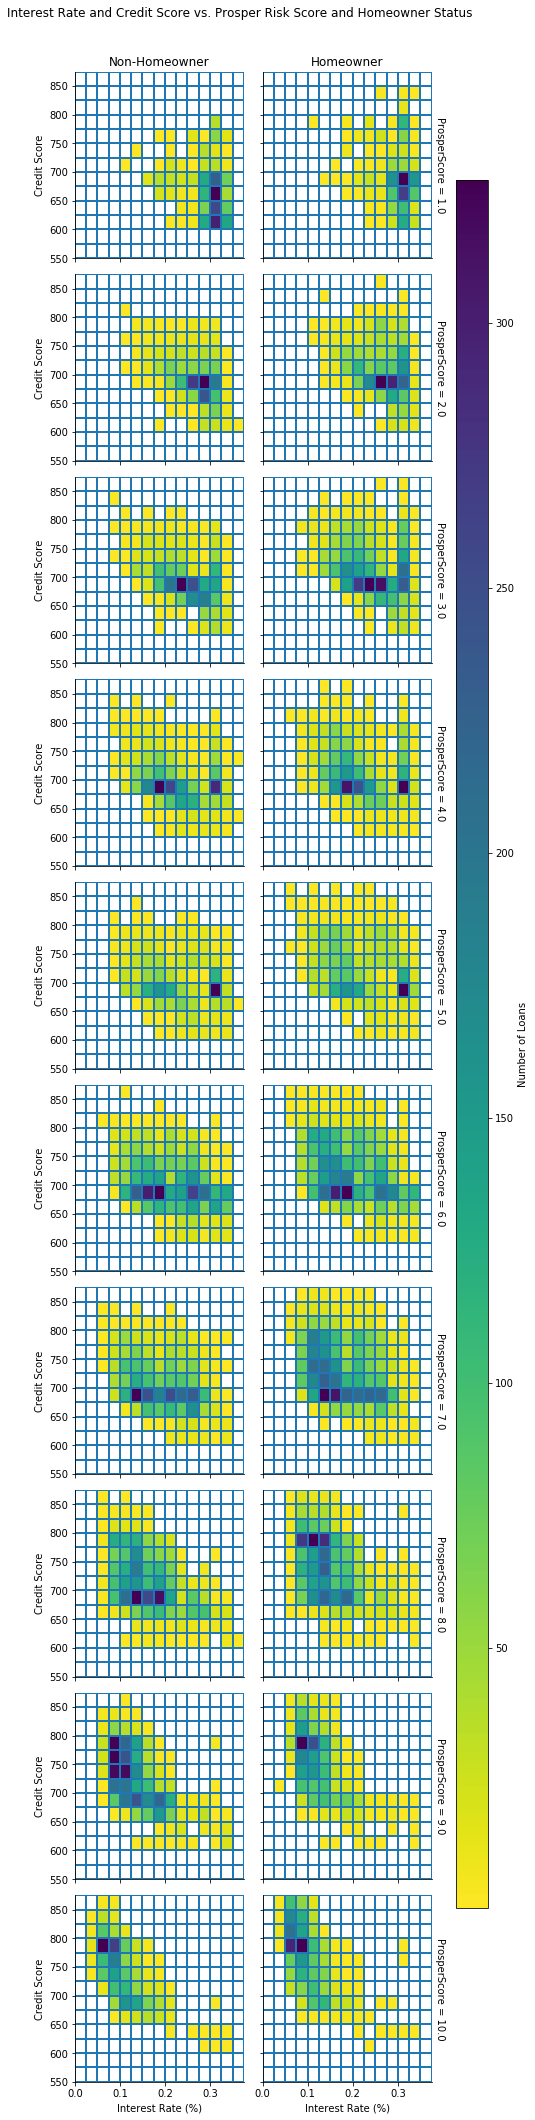

In [32]:
# #plot homeowner status and Prosper Risk Score vs credit score and interest rate

bins_x = np.arange(0, .35+.05, .025)
bins_y = np.arange(550, 850+50, 25)
g = sb.FacetGrid(data = loans_300_val, col = 'IsBorrowerHomeowner', row = 'ProsperScore',
                 margin_titles = True)
g.map(plt.hist2d, 'BorrowerRate', 'CreditScoreRangeUpper', cmin = 0.5,  cmap = 'viridis_r', bins = [bins_x, bins_y]);
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Interest Rate and Credit Score vs. Prosper Risk Score and Homeowner Status')
cax = plt.axes([1, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax, label = 'Number of Loans')
axes = g.axes.flatten()
axes[0].set_title("Non-Homeowner")
axes[1].set_title("Homeowner")
g.set_xlabels('Interest Rate (%)')
g.set_ylabels('Credit Score');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!